# Count categories in verticals

**Задача**: 
    посчитать распределение категорий по вертикалям по англоязячным странам (US, GB, AU, CA) на 1.06.2022 по Direct+ Affiliates <br />
    

### Загрузка библиотек

In [2]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from IPython.display import display
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from pandas.plotting import scatter_matrix
import math
#import random
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

from tqdm.auto import tqdm
from scipy.stats import norm
import requests
import re
from datetime import datetime
%matplotlib inline

# Вывод всех строк таблицы на экран

from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 100

### Загрузка данных

In [3]:

from io import BytesIO
import requests

spreadsheet_id = ''
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

paid = pd.read_csv(BytesIO(r.content))
paid.head()

In [4]:
# отчет по US
from io import BytesIO
import requests

spreadsheet_id = ''
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

cat_us = pd.read_csv(BytesIO(r.content))
cat_us['vertical'] = cat_us['vertical'].fillna('UNSPECIFIED')
cat_us.head()

In [5]:

from io import BytesIO
import requests

spreadsheet_id = ''
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

cat_gb = pd.read_csv(BytesIO(r.content))
cat_gb['vertical'] = cat_gb['vertical'].fillna('UNSPECIFIED')
cat_gb.head()

In [6]:

from io import BytesIO
import requests

spreadsheet_id = ''
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

cat_au = pd.read_csv(BytesIO(r.content))
cat_au['vertical'] = cat_au['vertical'].fillna('UNSPECIFIED')
cat_au.head()

In [8]:
# Отчет по CA
from io import BytesIO
import requests

spreadsheet_id = ''
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

cat_ca = pd.read_csv(BytesIO(r.content))
cat_ca['vertical'] = cat_ca['vertical'].fillna('UNSPECIFIED')
cat_ca.head()

,category_name,vertical,count
0,CLEARANCE,apparel,6
1,MEN,apparel,8
2,T-SHIRTS,apparel,10
3,MYSTERY,books,6
4,ACCESSORIES,electronics,7


In [ ]:
paid_merchants = pd.read_csv(r'C:\Users\Marina\Downloads\base acquired_cancelled 2022-06-15T1327.csv')
paid_merchants.head()    

In [75]:
paid_merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57129 entries, 0 to 57128
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Store Store ID                          57129 non-null  int64 
 1   Store.contact info Office Country Code  57106 non-null  object
 2   Store.signup survey 
     goods
        42853 non-null  object
 3   Report.metrics Paid At Eop              57129 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


In [76]:
paid_merchants.columns = ['store_id', 'country', 'vertical', 'paid_at_eop']
paid_merchants.head()

### Расчетная часть

In [80]:
# Выбираю top 10 стран
country_df = paid_merchants.pivot_table(index='country', \
                            values='store_id', \
                            aggfunc='nunique') \
.reset_index() \
.sort_values('store_id', ascending=False) \
.head(10)

country_list = country_df['country'].tolist()
country_list

['US', 'GB', 'AU', 'CA', 'RU', 'ZA', 'IT', 'DE', 'FR', 'IN']

### Top 10 verticals by countries

In [68]:
english_spoken_countries = ['US', 'GB', 'AU', 'CA']

In [87]:
top_10_verticals = paid_merchants.query('country in @english_spoken_countries') \
.groupby('vertical', as_index=False)['store_id'].nunique() \
.sort_values('store_id', ascending=False).head(10) \
.rename(columns={'store_id': 'n_stores'})

top_10_verticals

In [89]:
lst_top_10_verticals = top_10_verticals['vertical'].tolist()

### Top 10 categories

In [93]:
# Функция по выделению top 10 категорий из отчетов по странам
def top_10_categories_by_country(category_country_us,category_country_gb, category_country_ca, \
                                 category_country_au, lst_top_10_verticals):
    # Делаю срез по top 10 categories
    category_by_top_10_verticals_us = category_country_us.query('vertical in @lst_top_10_verticals')
    category_by_top_10_verticals_gb = category_country_gb.query('vertical in @lst_top_10_verticals')
    category_by_top_10_verticals_ca = category_country_ca.query('vertical in @lst_top_10_verticals')
    category_by_top_10_verticals_au = category_country_au.query('vertical in @lst_top_10_verticals')
    # Делаю append
    category_by_top_10_verticals_all_countries = category_by_top_10_verticals_us.append(category_by_top_10_verticals_gb) \
    .append(category_by_top_10_verticals_ca) \
    .append(category_by_top_10_verticals_au)
    
    return category_by_top_10_verticals_all_countries

In [98]:
# Применяю функцию
category_by_top_10_verticals_all_countries =  \
top_10_categories_by_country(cat_us, cat_gb, cat_ca, cat_au, lst_top_10_verticals)

In [99]:
category_by_top_10_verticals_all_countries.head()

,category_name,vertical,count
0,NEW ARRIVALS,apparel,66
1,T-SHIRTS,apparel,159
2,MUSIC,apparel,23
3,MEN,apparel,102
4,KOOZIES,apparel,11


In [101]:
category_by_top_10_verticals_all_countries.shape

(1038, 3)

In [136]:
# Группирую и выделяю в каждой вертикали top 10 categories
category_by_top_10_verticals_all_countries_grouped =  \
category_by_top_10_verticals_all_countries.groupby(['vertical', 'category_name'], as_index=False)['count'].sum() \
.sort_values(['vertical','count'],ascending=False).groupby('vertical').head(10) \
.rename(columns={'count': 'n_stores'})

category_by_top_10_verticals_all_countries_grouped

In [140]:
# Функция по графикам
def graphs(df, lst_top_10_verticals):
    for vertical in lst_top_10_verticals:
        df[df['vertical'] == vertical].plot.barh(x='category_name', \
             y='n_stores', color='green')
        plt.title(f'Top 10 categories by {vertical}')
        plt.show()

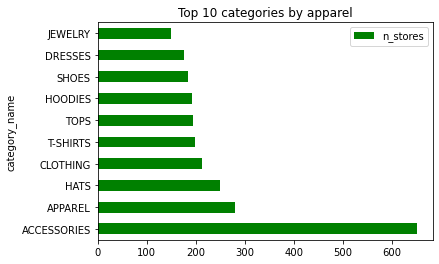

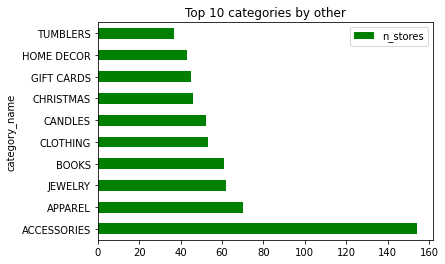

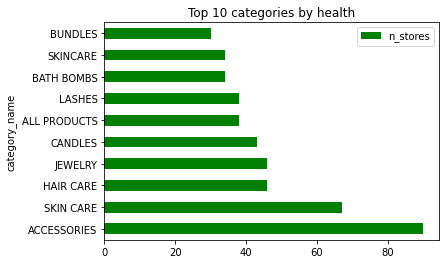

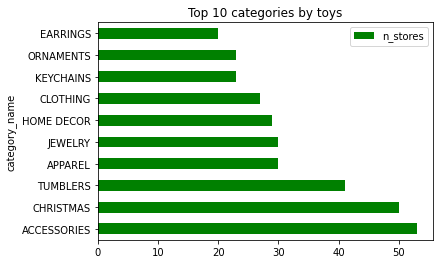

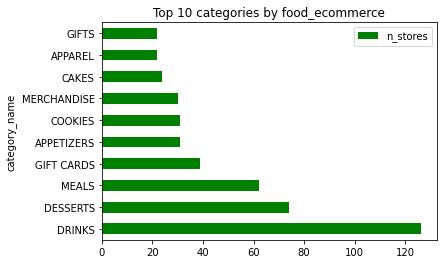

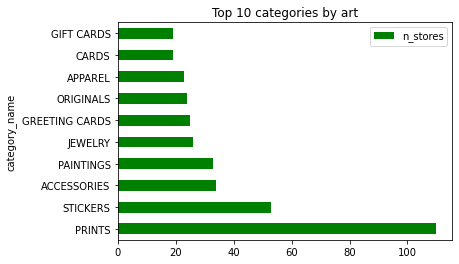

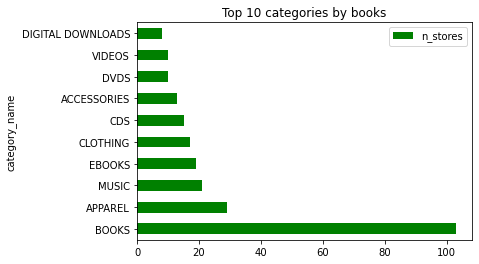

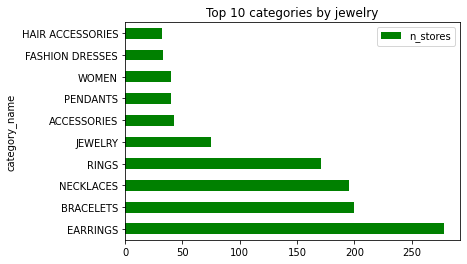

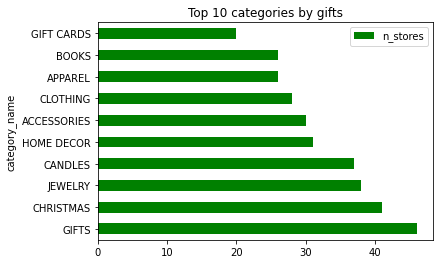

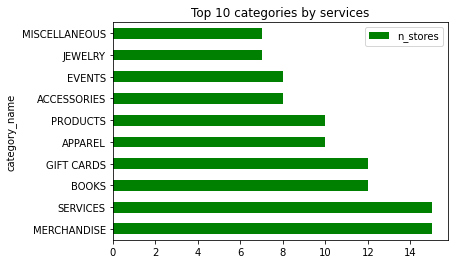

In [141]:
graphs(category_by_top_10_verticals_all_countries_grouped, lst_top_10_verticals)